In [1]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


C:\Users\jeka1\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
genotypes = pd.read_csv("Table_genotypes.csv")
cortical_thickness = pd.read_csv("cortical_thickness_by_subject.csv")

In [3]:
def GetNumericEquivalent(df, gene):
    le = preprocessing.LabelEncoder()
    le.fit(df[gene])
    return le.transform(df[gene])

In [4]:
genotypes_coded = pd.DataFrame({'subject_id':genotypes.subject_id,'apoe':GetNumericEquivalent(genotypes, 'apoe'),
             'bin1':GetNumericEquivalent(genotypes, 'bin1'), 'clu':GetNumericEquivalent(genotypes, 'clu'),
             'abca7':GetNumericEquivalent(genotypes, 'abca7'), 'cr1':GetNumericEquivalent(genotypes, 'cr1'),
             'picalm':GetNumericEquivalent(genotypes, 'picalm')})
genotypes_coded.head()

,subject_id,apoe,bin1,clu,abca7,cr1,picalm
0,s_001,2,1,0,2,2,1
1,s_002,0,1,0,2,2,2
2,s_003,1,1,0,1,1,1
3,s_004,0,1,0,2,2,1
4,s_005,1,1,1,2,2,0


In [5]:
full_df = pd.concat([cortical_thickness, genotypes_coded], axis=1, join='inner')
full_df.head()

,subject_id,left_G_and_S_frontomargin,left_G_and_S_occipital_inf,left_G_and_S_paracentral,left_G_and_S_subcentral,left_G_and_S_transv_frontopol,left_G_and_S_cingul.Ant,left_G_and_S_cingul.Mid.Ant,left_G_and_S_cingul.Mid.Post,left_G_cingul.Post.dorsal,...,right_S_temporal_inf,right_S_temporal_sup,right_S_temporal_transverse,subject_id,apoe,bin1,clu,abca7,cr1,picalm
0,s_001,1.805,1.866,1.772,2.449,1.970,2.039,2.551,2.251,2.891,...,2.442,2.065,1.399,s_001,2,1,0,2,2,1
1,s_002,2.201,2.151,1.922,2.447,2.263,2.587,2.524,2.153,2.621,...,2.541,2.399,2.713,s_002,0,1,0,2,2,2
2,s_003,2.012,1.813,1.724,2.131,2.225,2.572,2.525,2.349,2.738,...,2.254,2.180,1.865,s_003,1,1,0,1,1,1
3,s_004,2.203,1.765,2.142,2.659,2.331,2.335,2.422,2.383,2.834,...,2.418,2.404,2.451,s_004,0,1,0,2,2,1
4,s_005,2.118,2.013,1.582,2.062,2.233,2.541,2.652,2.526,2.885,...,2.864,2.273,1.779,s_005,1,1,1,2,2,0


In [6]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

Mean squared error: 0.02
Variance score: 0.05


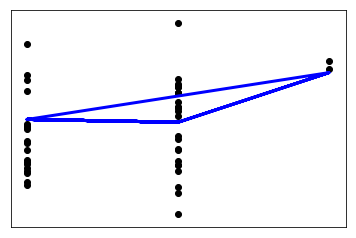

In [12]:
#Transform categorical feature to numeric by simple number substitution

X_train, X_test, y_train, y_test = train_test_split(full_df[['picalm']],full_df['left_S_circular_insula_inf'], test_size = 0.3)
# Create linear regression object
#regr = linear_model.LinearRegression()
regr = KNeighborsRegressor(n_neighbors=5,leaf_size=10)
# Train the model using the training sets
#!!!!if we have regression from only 1 gene: 
regr.fit(np.array(X_train).reshape(-1, 1), y_train)
#regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(np.array(X_test).reshape(-1, 1))
#y_pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, full_df[['apoe', 'bin1']], full_df['left_G_subcallosal'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.23 (+/- 0.27)


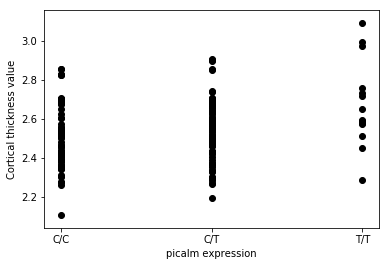

In [21]:
plt.scatter(genotypes[['picalm']], full_df['left_S_circular_insula_inf'],  color='black')

#plt.xticks(('C/T', 'T/T', 'C/C'))
#plt.yticks(())
plt.ylabel("Cortical thickness value")
plt.xlabel("picalm expression")
plt.show()

In [161]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(genotypes[['picalm']]).drop('picalm_T/T', axis = 1),full_df['left_S_circular_insula_inf'], test_size = 0.3)
# Create linear regression object
#regr = linear_model.LinearRegression()
regr = KNeighborsRegressor(n_neighbors=3,leaf_size=10)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 0.03
Variance score: 0.10


In [165]:
scores = cross_val_score(regr, pd.get_dummies(genotypes[['picalm']]).drop('picalm_T/T', axis = 1), full_df['left_S_circular_insula_inf'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.09 (+/- 0.25)


In [1364]:
genes_dummies = pd.get_dummies(genotypes[['apoe', 'bin1', 'clu', 'abca7', 'cr1', 'picalm']])
genes_dummies.to_csv("genes_dummies.csv")